In [ ]:
!pip install tensorflow

In [ ]:
!pip install icrawler

In [ ]:
from icrawler.builtin import GoogleImageCrawler

keywords = ['orange fruit']

for keyword in keywords:
    storage = {'root_dir': f'validation/{keyword.split()[0]}'}
    google_crawler = GoogleImageCrawler(storage=storage)
    google_crawler.crawl(keyword=keyword, max_num=50)

ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/185284489/photo/orange.jpg
ERROR:downloader:Exception caught when downloading file https://png, error: HTTPSConnectionPool(host='png', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7958587c0250>: Failed to resolve 'png' ([Errno -2] Name or service not known)")), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://png, error: HTTPSConnectionPool(host='png', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7958587c0c10>: Failed to resolve 'png' ([Errno -2] Name or service not known)")), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://png, error: HTTPSConnectionPool(host='png', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

MODEL_SAVE_PATH = 'fruit_cnn_model.h5'

print(f"Model will be saved to: {MODEL_SAVE_PATH}")

Model will be saved to: fruit_cnn_model.keras
Please download 'fruit_cnn_model.h5' and 'class_names.txt' after training.


In [ ]:
TRAIN_DIR = '/content/train'
VALIDATION_DIR = '/content/validation'
TEST_DIR = '/content/test'

print(f"Train Directory: {TRAIN_DIR}")
print(f"Validation Directory: {VALIDATION_DIR}")
print(f"Test Directory: {TEST_DIR}")

if not os.path.exists(TRAIN_DIR):
    raise FileNotFoundError(f"Error: Training directory not found at {TRAIN_DIR}. Please ensure your data is uploaded.")
if not os.path.exists(VALIDATION_DIR):
    raise FileNotFoundError(f"Error: Validation directory not found at {VALIDATION_DIR}. Please ensure your data is uploaded.")
if not os.path.exists(TEST_DIR):
    raise FileNotFoundError(f"Error: Test directory not found at {TEST_DIR}. Please ensure your data is uploaded.")

Train Directory: /content/train
Validation Directory: /content/validation
Test Directory: /content/test


In [ ]:
!rm -rf /content/train/.ipynb_checkpoints
!rm -rf /content/validation/.ipynb_checkpoints
!rm -rf /content/test/.ipynb_checkpoints
print("Removed .ipynb_checkpoints folders.")

Removed .ipynb_checkpoints folders.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_test_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- Setting up Data Generators ---")
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_test_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = validation_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

NUM_CLASSES = len(train_generator.class_indices)
print(f"Number of classes found: {NUM_CLASSES}")
print(f"Class indices: {train_generator.class_indices}")
CLASS_NAMES = list(train_generator.class_indices.keys())


--- Setting up Data Generators ---
Found 200 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Number of classes found: 4
Class indices: {'apple': 0, 'banana': 1, 'mango': 2, 'orange': 3}


In [ ]:
NUM_CLASSES = len(train_generator.class_indices)
print(f"Number of classes found: {NUM_CLASSES}")
print(f"Class indices: {train_generator.class_indices}")
CLASS_NAMES = list(train_generator.class_indices.keys())

Number of classes found: 4
Class indices: {'apple': 0, 'banana': 1, 'mango': 2, 'orange': 3}


In [ ]:
print("\n--- Building the CNN Model ---")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()


--- Building the CNN Model ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,940,868 (49.37 MB)

 Trainable params: 12,940,868 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n--- Compiling the Model ---")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


--- Compiling the Model ---


In [ ]:
print(f"\n--- Starting Training for {EPOCHS} Epochs ---")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    verbose=1
)

print("\nTraining finished.")


--- Starting Training for 10 Epochs ---
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.1952 - loss: 2.5742 - val_accuracy: 0.2917 - val_loss: 1.4131
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2812 - loss: 1.4702

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2812 - loss: 1.4702 - val_accuracy: 0.3125 - val_loss: 1.3624
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.2965 - loss: 1.3484 - val_accuracy: 0.4115 - val_loss: 1.2581
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3750 - loss: 1.3165 - val_accuracy: 0.4583 - val_loss: 1.2480
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.3924 - loss: 1.2983 - val_accuracy: 0.4115 - val_loss: 1.2862
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4688 - loss: 1.2629 - val_accuracy: 0.4323 - val_loss: 1.2205
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.3980 - loss: 1.2054 - val_accuracy: 0.6094 - val_loss: 1.0422
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4688 - loss: 1.1276 - val_accuracy: 0.6198 - val_loss: 1.0142
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5643 - loss: 0.9919 - val_accuracy: 0.6146 - val_loss: 0.9743
Epoch 10/10
6/6 ━━━


--- Evaluating model on validation set ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6813 - loss: 0.8633
Validation Loss: 0.9308
Validation Accuracy: 0.6200

--- Evaluating model on test set ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6850 - loss: 0.8547
Test Loss: 0.9210
Test Accuracy: 0.6250

--- Plotting Training History ---


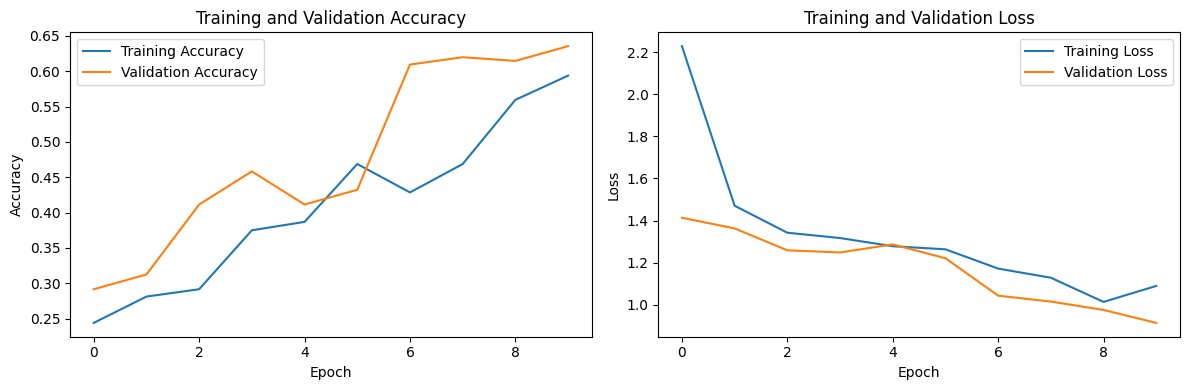

In [ ]:
print("\n--- Evaluating model on validation set ---")
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\n--- Evaluating model on test set ---")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\n--- Plotting Training History ---")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
try:
    model.save(MODEL_SAVE_PATH)
    print(f"\nModel saved successfully to {MODEL_SAVE_PATH}")
except Exception as e:
    print(f"Error saving model: {e}")

class_names_path = 'class_names.txt'
with open(class_names_path, 'w') as f:
    for class_name in CLASS_NAMES:
        f.write(f"{class_name}\n")
print(f"Class names saved to {class_names_path}")

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0
